## DIMACS Graph Reader

In [ ]:
!pip install networkx
!pip install scipy

In [3]:
import sys

# Imports

import csv
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import collections
import os
import random
import numpy as np
import scipy.stats
%matplotlib inline

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

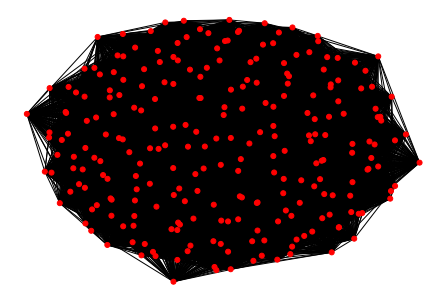

In [2]:
def load_graph(fp):
    '''
    Load an edgelist format file as a graph.
    
    :param fp: filename
    :return: graph object and its colour map
    '''
    
    with open(fp, 'rb') as fh:
        Gx = nx.read_edgelist(fh, nodetype=int)
    
    colour_map = []
    for node in Gx:
        colour_map.append('red')
    
    return (Gx, colour_map)

# Test Graph Loading
Gx, colour_map = load_graph("./Graphs2/dsjc/dsjc250_5.txt")
pos = nx.spring_layout(Gx)

nx.draw(Gx, node_color=colour_map, with_labels=False, node_size=25)

## Colouring the Graph

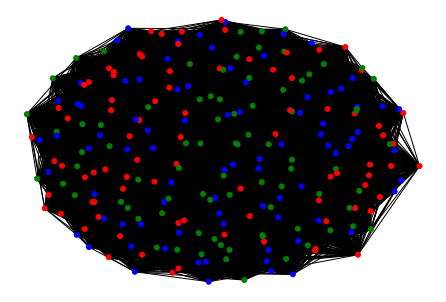

In [3]:
def generate_random_3_colouring(Gx):
    '''
    Randomly colour each node of a graph as either blue, green, or red.
    
    :param Gx: The graph object
    '''
    colour_map = []
    for node in Gx:
        colour_map.append(random.choice(['blue', 'red', 'green']))
    
    return colour_map

# Create a sample 3 Graph Colouring
rand_colour_map = generate_random_3_colouring(Gx)
nx.draw(Gx, node_color=rand_colour_map, with_labels=False, node_size=25)

## Check Adjacency Clashes

10446


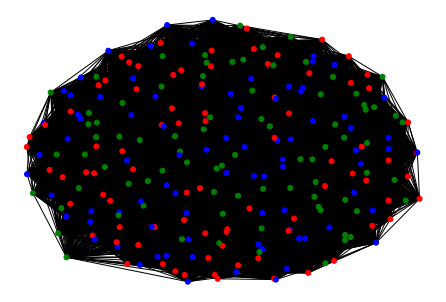

In [4]:
def objective_func(Gx, colour_map):
    '''
    Test objective function for the project, checks for adjacent nodes clashing in colour.
    
    :param Gx: The graph object
    :param colour_map: The graph's colour map
    
    :return: The fitness of the graph based on the number of neighbours that share colours
    '''
    
    error = 0
    
    for node in Gx:

        neighbours = nx.all_neighbors(Gx, node)
        for n in neighbours:
            if colour_map[node-1] == colour_map[n-1]:
                error += 1
    return error

print(objective_func(Gx, rand_colour_map))

nx.draw(Gx, node_color=rand_colour_map, with_labels=False, node_size=25)

## Initial Testing of Method with Petersen and Barbell Graphs

     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 12161
     nit: 80
 success: True
       x: array([1.31882678, 1.55803039, 0.18834419, 1.54862052, 0.26905591,
       0.35692636, 0.06059954, 0.56643049, 1.03566766, 1.50885997])

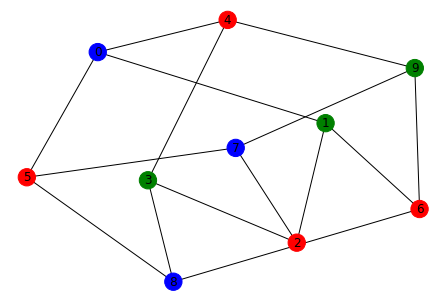

In [5]:
from scipy.optimize import differential_evolution, Bounds

def single_param_obj(x):
    '''
    An updated objective function which can operate on one parameter.
    
    :param x: the solution vector to be tested
    
    :return: the number of colour clashes caused by x
    '''
    
    error = 0
    node_list = list(G.nodes)
    
    for node in G:
        neighbours = nx.all_neighbors(G, node)
        for n in neighbours:
            # Round so that float maps to {0, 1, 2}
            if round(x[node_list.index(node)]) == round(x[node_list.index(n)]):
                error += 1
    return error

def draw_result(G, x):
    '''
    Draw the resulting graph.
    
    :param G: The graph object
    :param x: The solution vector
    '''
    
    colour_dict = {0: "red", 1: "blue", 2: "green"}
    colour_map = []
    
    for ix in x:
        colour_map.append(colour_dict[round(ix)])
    
    nx.draw(G, node_color=colour_map, with_labels=True)

# Run an example test on the Petersen Graph
G = nx.petersen_graph()
bounds = Bounds(np.zeros(len(G)), np.ones(len(G))*2.)

result = differential_evolution(single_param_obj, bounds, maxiter=100)

draw_result(G, result.x)
result

     fun: 8.0
 message: 'Optimization terminated successfully.'
    nfev: 10813
     nit: 59
 success: True
       x: array([1.69925591, 1.24412077, 1.8010085 , 0.35430686, 0.66358467,
       1.71615521, 0.0935912 , 1.04598278, 1.5497005 , 0.40920241,
       0.19897996, 1.80588977])

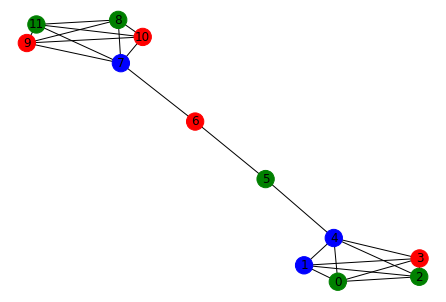

In [6]:
# Run example test on a simple barbell graph

G = nx.barbell_graph(5, 2)
bounds = Bounds(np.zeros(len(G)), np.ones(len(G))*2.)

result = differential_evolution(single_param_obj, bounds, maxiter=100)

draw_result(G, result.x)
result

     fun: 8.0
 message: 'Optimization terminated successfully.'
    nfev: 4153
     nit: 22
 success: True
       x: array([0.30008091, 0.64200226, 0.45597355, 1.78483284, 0.53211439,
       1.77610876, 1.44344068, 1.73885601, 0.35439611, 1.68004635,
       0.68060659, 1.11146457])


     fun: 8.0
 message: 'Optimization terminated successfully.'
    nfev: 4153
     nit: 22
 success: True
       x: array([0.30008091, 0.64200226, 0.45597355, 1.78483284, 0.53211439,
       1.77610876, 1.44344068, 1.73885601, 0.35439611, 1.68004635,
       0.68060659, 1.11146457])

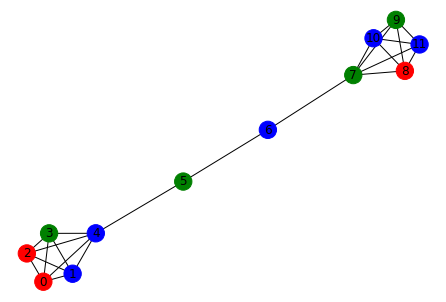

In [7]:
def run_test(graph, max_iter=100, num_pop=15, m=0.5, cr=0.7):
    '''
    Run the differential evolution with parameters.
    
    :param graph: The graph to run the test on
    :param max_iter: Maximum iterations before stopping the algorithm
    :param num_pop: The population size
    :param m: The mutation rate
    :param cr: The recombination constant
    '''
    
    # Set the global graph G to the current test graph
    global G
    G = graph
    
    # Add bounds to prevent erroneous values
    bounds = Bounds(np.zeros(len(G.nodes)), np.ones(len(G.nodes))*2.)
    result = differential_evolution(single_param_obj, bounds, maxiter=max_iter, popsize=num_pop, mutation=m, recombination=cr)
    draw_result(G, result.x)
    print(result)
    return result

# Test function returns similar result as last test
run_test(nx.barbell_graph(5, 2))

## Experimentation

In [8]:
def run_default_tests(data_directory, output_name):
    '''
    Run differential evolution with default parameters on each graph in directory and output results to a file.
    
    :param data_directory: Directory where the files reside
    :param output_name: Name of output file
    '''
    
    results = {}
    
    # Populate dictionary with results for each input file
    for filename in os.listdir(data_directory):
        if filename.endswith(".col"):
            graph, colour_map = load_graph(os.path.join(data_directory, filename))
            print("Name: " + os.path.splitext(filename)[0])
            print("Nodes: " + str(len(list(graph.nodes))))
            results[os.path.splitext(filename)[0]] = run_test(graph)
    
    for k in results:
        print("File: " + str(k) + " Func: " + str(results[k].fun))
    
    # Write results to file
    w = csv.writer(open(output_name, "w"))
    for key, val in results.items():
        w.writerow([key, val.fun, val.nit, val.x])

In [9]:
def run_optimisation_test(input_file, input_name, output_name, num_pops, ms, rs):
    '''
    Run tests with every combination of parameters possible from given lists and write results to a file.
    
    :param input_file: File containing the graph
    :param input_name: Name to be noted in csv
    :param output_name: Name of output file
    :param num_pops: Population sizes
    :param ms: Mutation rates
    :param rs: Recombination constants
    '''
    
    w = csv.writer(open(output_name, "w"))
    
    for num_pop in num_pops:
        for m in ms:
            for r in rs:
                graph, colour_map = load_graph(input_file)
                result = run_test(graph, num_pop=num_pop, m=m, cr=r)
                w.writerow([input_name, result.fun, result.nit, num_pop, m, r, result.success, result.x])

In [10]:
def run_optimisation_tests(data_directory, num_pops, ms, rs):
    '''
    Run tests on all files in a directory with every combination of parameters given and write results to a file.
    
    :param data_directory: Directory where the files reside
    :param num_pops: Population sizes
    :param ms: Mutation rates
    :param rs: Recombination constants
    '''
    
    for filename in os.listdir(data_directory):
        if filename.endswith(".col"):
            run_optimisation_test(os.path.join(data_directory, filename), os.path.splitext(filename)[0], os.path.splitext(filename)[0] + "_optimisation_results.csv", num_pops, ms, rs)

In [1]:
def read_optimisation_csv(filename):
    '''
    Read csv into a pandas dataframe.
    
    :param filename: Name of the file
    
    :return: Pandas dataframe containing the data
    '''
    df = pd.read_csv(filename, names=["Graph", "F", "Iters", "Pop", "M", "R", "Success", "Colour Map"])
    return df

def find_averages(data, grouping_param, param_vals):
    '''
    Find average iterations of each test grouped by a certain parameter.
    
    :param data: The dataframe containing all the data
    :param grouping_param: Parameter to be grouped by
    :param param_vals: A list of values the parameter may take
    
    :return: The averages and the corresponding parameter values
    '''
    
    avgs = []
    
    for x in param_vals:
        df = data.loc[data[grouping_param] == x]
        avgs.append(df.Iters.sum() / len(df))
        
    return avgs, param_vals

def find_fitness_averages(data, grouping_param, param_vals):
    '''
    Find average fitness of each test grouped by a certain parameter.
    
    :param data: The dataframe containing all the data
    :param grouping_param: Parameter to be grouped by
    :param param_vals: A list of values the parameter may take
    
    :return: The averages and the corresponding parameter values
    '''
    
    avgs = []
    
    for x in param_vals:
        df = data.loc[data[grouping_param] == x]
        avgs.append(df.F.sum() / len(df))
        
    return avgs, param_vals

def multi_plot(xs, ys, plt_num, labels, x_lbl=None, y_lbl=None):
    '''
    Plot multiple lines on a graph.
    
    :param xs: All the x-value lists to be plotted
    :param ys: All the y-value lists to be plotted
    :param plt_num: Number of lines to plot
    :param labels: The label for each line
    :param x_lbl: x-axis label
    :param y_lbl: y-axis label
    '''
    
    for i in range(plt_num):
        plt.plot(xs[i], ys[i], label=labels[i])
    plt.xlabel(x_lbl)
    plt.ylabel(y_lbl)
    plt.legend()

def single_plot(x, y, x_lbl=None, y_lbl=None):
    '''
    Plot a single line on a graph.
    
    :param x: The x-value list to be plotted
    :param y: The y-value lists to be plotted
    :param x_lbl: x-axis label
    :param y_lbl: y-axis label
    '''
    
    plt.plot(x, y)
    plt.xlabel(x_lbl)
    plt.ylabel(y_lbl)

### myciel Testing

In [ ]:
run_default_tests("./Graphs2/myciel", "myciel_base_results.csv")

In [ ]:
num_pops = range(5, 31, 5)
ms = [0.2, 0.35, 0.5, 0.65, 0.8, 0.95]
rs = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

run_optimisation_tests("./Graphs2/myciel", num_pops, ms, rs)

#### Graphs

##### myciel3 

*Fitness Function*

In [18]:
num_pops = range(5, 31, 5)
ms = [0.2, 0.35, 0.5, 0.65, 0.8, 0.95]
rs = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

df = read_optimisation_csv("./myciel3_optimisation_results.csv")
ypf3, xpf3 = find_fitness_averages(df, "Pop", num_pops)
ymf3, xmf3 = find_fitness_averages(df, "M", ms)
yrf3, xrf3 = find_fitness_averages(df, "R", rs)

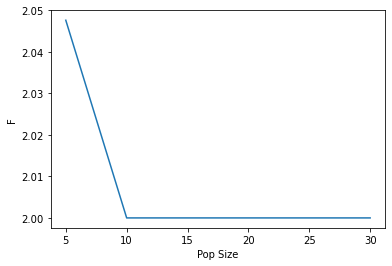

In [19]:
single_plot(xpf3, ypf3, x_lbl="Pop Size", y_lbl="F")

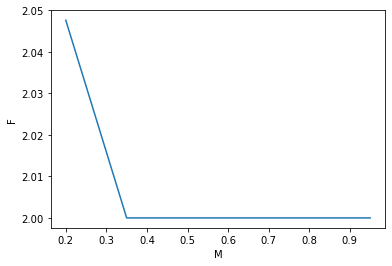

In [20]:
single_plot(xmf3, ymf3, x_lbl="M", y_lbl="F")

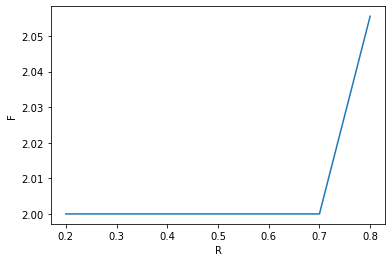

In [21]:
single_plot(xrf3, yrf3, x_lbl="R", y_lbl="F")

*Convergence*

In [22]:
num_pops = range(5, 31, 5)
ms = [0.2, 0.35, 0.5, 0.65, 0.8, 0.95]
rs = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

df = read_optimisation_csv("./myciel3_optimisation_results.csv")
yp3, xp3 = find_averages(df, "Pop", num_pops)
ym3, xm3 = find_averages(df, "M", ms)
yr3, xr3 = find_averages(df, "R", rs)

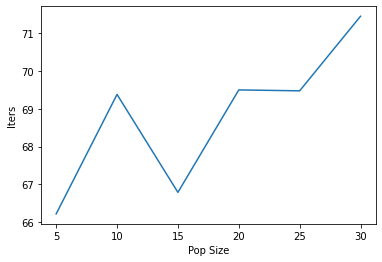

In [45]:
single_plot(xp3, yp3, x_lbl="Pop Size", y_lbl="Iters")

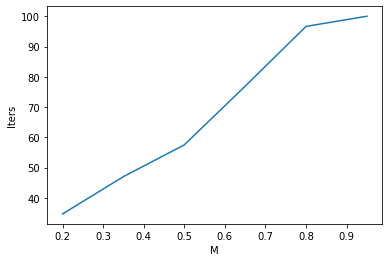

In [46]:
single_plot(xm3, ym3, x_lbl="M", y_lbl="Iters")

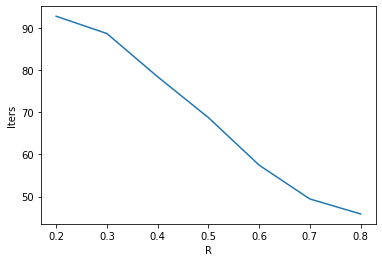

In [47]:
single_plot(xr3, yr3, x_lbl="R", y_lbl="Iters")

##### myciel4

*Fitness Function*

In [23]:
df = read_optimisation_csv("./myciel4_optimisation_results.csv")
ypf4, xpf4 = find_fitness_averages(df, "Pop", num_pops)
ymf4, xmf4 = find_fitness_averages(df, "M", ms)
yrf4, xrf4 = find_fitness_averages(df, "R", rs)

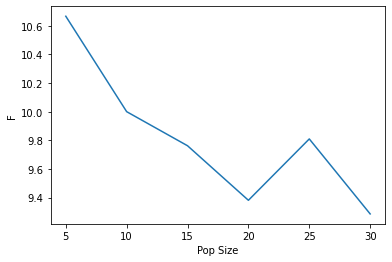

In [24]:
single_plot(xpf4, ypf4, x_lbl="Pop Size", y_lbl="F")

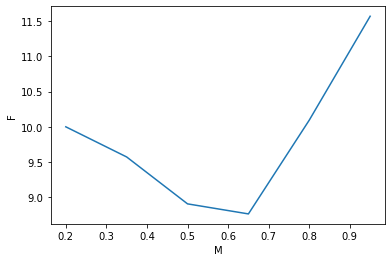

In [25]:
single_plot(xmf4, ymf4, x_lbl="M", y_lbl="F")

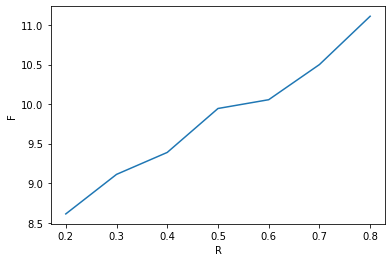

In [26]:
single_plot(xrf4, yrf4, x_lbl="R", y_lbl="F")

*Convergence*

In [27]:
df = read_optimisation_csv("./myciel4_optimisation_results.csv")
yp4, xp4 = find_averages(df, "Pop", num_pops)
ym4, xm4 = find_averages(df, "M", ms)
yr4, xr4 = find_averages(df, "R", rs)

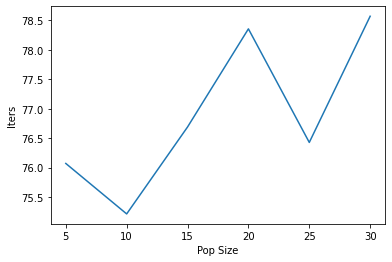

In [49]:
single_plot(xp4, yp4, x_lbl="Pop Size", y_lbl="Iters")

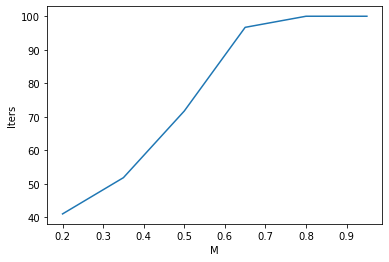

In [50]:
single_plot(xm4, ym4, x_lbl="M", y_lbl="Iters")

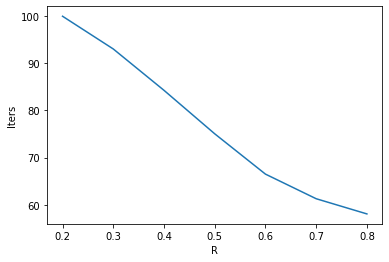

In [51]:
single_plot(xr4, yr4, x_lbl="R", y_lbl="Iters")

##### myciel5

*Fitness Function*

In [28]:
df = read_optimisation_csv("./myciel5_optimisation_results.csv")
ypf5, xpf5 = find_fitness_averages(df, "Pop", num_pops)
ymf5, xmf5 = find_fitness_averages(df, "M", ms)
yrf5, xrf5 = find_fitness_averages(df, "R", rs)

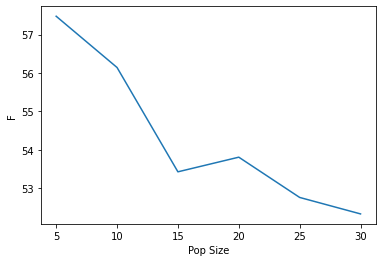

In [29]:
single_plot(xpf5, ypf5, x_lbl="Pop Size", y_lbl="F")

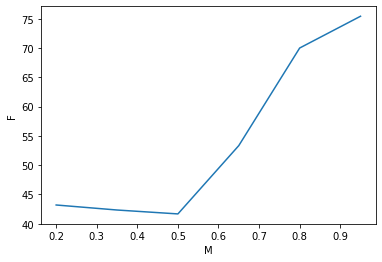

In [42]:
single_plot(xmf5, ymf5, x_lbl="M", y_lbl="F")

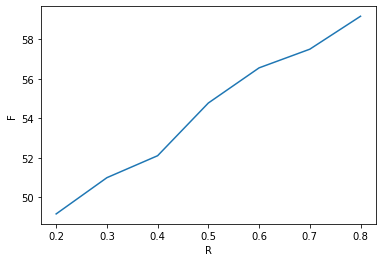

In [43]:
single_plot(xrf5, yrf5, x_lbl="R", y_lbl="F")

*Convergence*

In [32]:
df = read_optimisation_csv("./myciel5_optimisation_results.csv")
yp5, xp5 = find_averages(df, "Pop", num_pops)
ym5, xm5 = find_averages(df, "M", ms)
yr5, xr5 = find_averages(df, "R", rs)

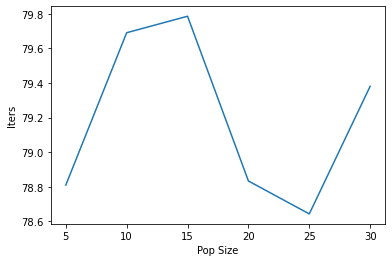

In [53]:
single_plot(xp5, yp5, x_lbl="Pop Size", y_lbl="Iters")

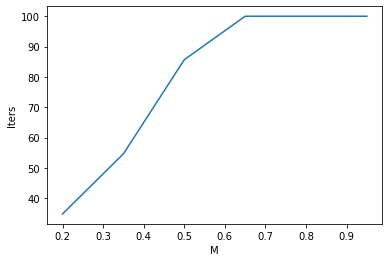

In [54]:
single_plot(xm5, ym5, x_lbl="M", y_lbl="Iters")

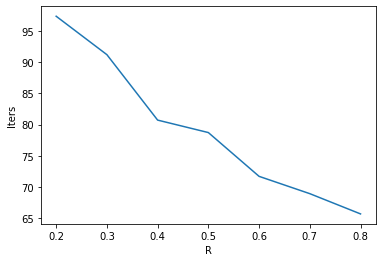

In [55]:
single_plot(xr5, yr5, x_lbl="R", y_lbl="Iters")

##### myciel6

*Fitness Function*

In [33]:
df = read_optimisation_csv("./myciel6_optimisation_results.csv")
ypf6, xpf6 = find_fitness_averages(df, "Pop", num_pops)
ymf6, xmf6 = find_fitness_averages(df, "M", ms)
yrf6, xrf6 = find_fitness_averages(df, "R", rs)

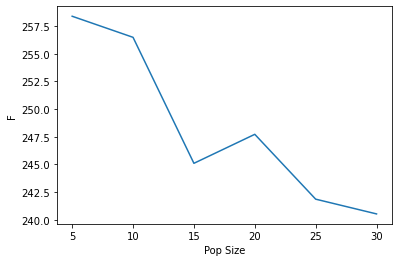

In [34]:
single_plot(xpf6, ypf6, x_lbl="Pop Size", y_lbl="F")

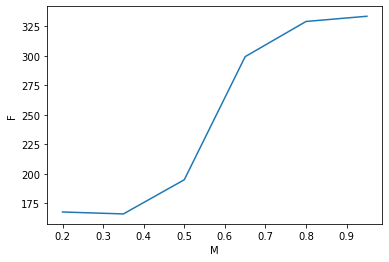

In [35]:
single_plot(xmf6, ymf6, x_lbl="M", y_lbl="F")

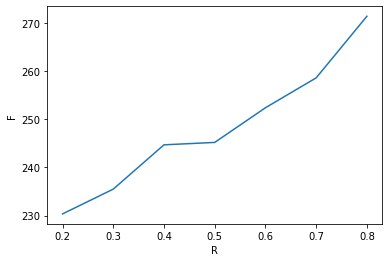

In [36]:
single_plot(xrf6, yrf6, x_lbl="R", y_lbl="F")

*Convergence*

In [56]:
df = read_optimisation_csv("./myciel6_optimisation_results.csv")
yp6, xp6 = find_averages(df, "Pop", num_pops)
ym6, xm6 = find_averages(df, "M", ms)
yr6, xr6 = find_averages(df, "R", rs)

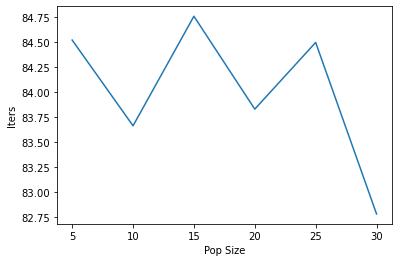

In [57]:
single_plot(xp6, yp6, x_lbl="Pop Size", y_lbl="Iters")

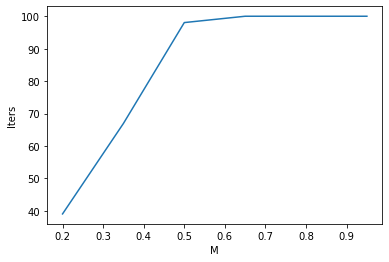

In [58]:
single_plot(xm6, ym6, x_lbl="M", y_lbl="Iters")

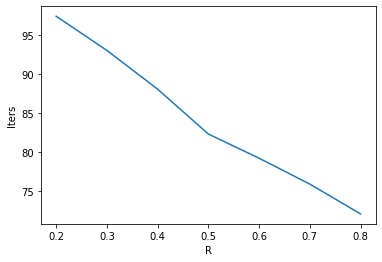

In [59]:
single_plot(xr6, yr6, x_lbl="R", y_lbl="Iters")

##### Comparison of Graphs

*Fitness Function*

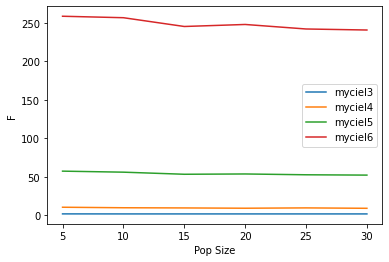

In [39]:
xs = [xpf3, xpf4, xpf5, xpf6]
ys = [ypf3, ypf4, ypf5, ypf6]
labels = ["myciel3", "myciel4", "myciel5", "myciel6"]
multi_plot(xs, ys, 4, labels, x_lbl="Pop Size", y_lbl="F")

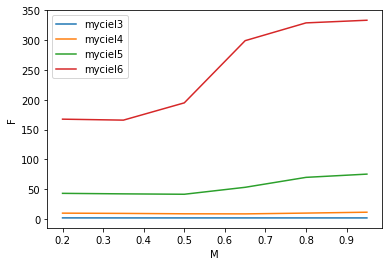

In [40]:
xs = [xmf3, xmf4, xmf5, xmf6]
ys = [ymf3, ymf4, ymf5, ymf6]
labels = ["myciel3", "myciel4", "myciel5", "myciel6"]
multi_plot(xs, ys, 4, labels, x_lbl="M", y_lbl="F")

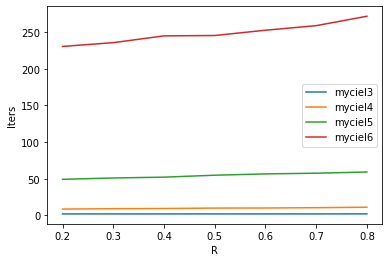

In [41]:
xs = [xrf3, xrf4, xrf5, xrf6]
ys = [yrf3, yrf4, yrf5, yrf6]
labels = ["myciel3", "myciel4", "myciel5", "myciel6"]
multi_plot(xs, ys, 4, labels, x_lbl="R", y_lbl="Iters")

*Convergence*

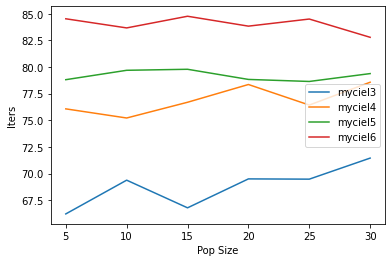

In [68]:
xs = [xp3, xp4, xp5, xp6]
ys = [yp3, yp4, yp5, yp6]
labels = ["myciel3", "myciel4", "myciel5", "myciel6"]
multi_plot(xs, ys, 4, labels, x_lbl="Pop Size", y_lbl="Iters")

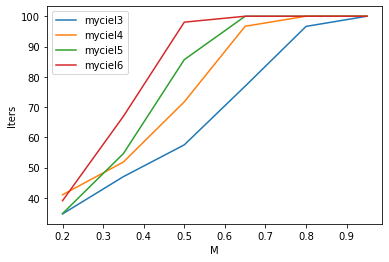

In [69]:
xs = [xm3, xm4, xm5, xm6]
ys = [ym3, ym4, ym5, ym6]
labels = ["myciel3", "myciel4", "myciel5", "myciel6"]
multi_plot(xs, ys, 4, labels, x_lbl="M", y_lbl="Iters")

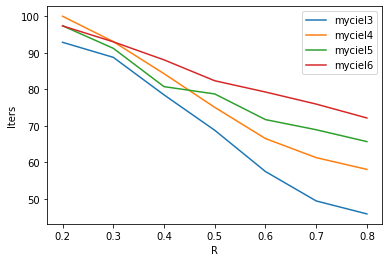

In [70]:
xs = [xr3, xr4, xr5, xr6]
ys = [yr3, yr4, yr5, yr6]
labels = ["myciel3", "myciel4", "myciel5", "myciel6"]
multi_plot(xs, ys, 4, labels, x_lbl="R", y_lbl="Iters")

### Queen Testing

In [ ]:
run_default_tests("./Graphs2/queen", "queen_base_results.csv")

In [ ]:
num_pops = range(5, 31, 5)
ms = [0.2, 0.35, 0.5, 0.65, 0.8, 0.95]
rs = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

run_optimisation_tests("./Graphs2/queen", num_pops, ms, rs)

### Stanford Testing

In [ ]:
run_default_tests("./Graphs2/stanford", "stanford_base_results.csv")

In [ ]:
num_pops = range(5, 31, 5)
ms = [0.2, 0.35, 0.5, 0.65, 0.8, 0.95]
rs = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

run_optimisation_tests("./Graphs2/stanford", num_pops, ms, rs)

### Zero-in Testing

In [ ]:
run_default_tests("./Graphs2/zeroin", "zeroin_base_results.csv")

In [ ]:
num_pops = range(5, 31, 5)
ms = [0.2, 0.35, 0.5, 0.65, 0.8, 0.95]
rs = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

run_optimisation_tests("./Graphs2/zeroin", num_pops, ms, rs)